# PD 7

In [3]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as pltim

In [4]:
#Wczytanie zdjęcia
image = pltim.imread('dog.png')

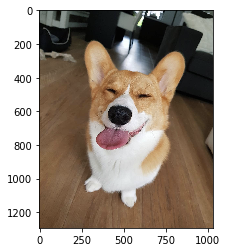

In [5]:
plt.imshow(image)

In [49]:
#Macierz obrazu
image.shape

(1292, 1032, 4)

In [50]:
#Przekształcenie do 2D
image_2 = np.reshape(image, (1292, 4128))
print('Rozmiar oryginalny:')
org_size = image_2.size
print(org_size)
print('Wymiar macierzy 2D:')
print(image_2.shape)

Rozmiar oryginalny:
5333376
Wymiar macierzy 2D:
(1292, 4128)


## PCA

Text(0, 0.5, 'Odsetek wyjaśnionej wariancji')

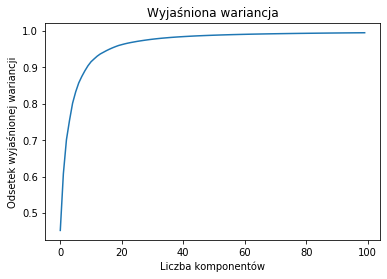

In [45]:
pca = PCA(n_components=100)
pca.fit(image_2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Wyjaśniona wariancja")
plt.xlabel("Liczba komponentów")
plt.ylabel("Odsetek wyjaśnionej wariancji")

Około 20 czynników powinno zapewnić wystarczające przedstawienie zbioru. Odpowiada za wyjaśnienie ok. 96% wariancji.

In [47]:
round(100*(np.cumsum(pca.explained_variance_ratio_)[20]))

96.0

In [52]:
#Użycie PCA z 20 komponentami
pca = PCA(n_components=20)
image_pca = pca.fit_transform(image_2)

In [53]:
print('Rozmiar zmniejszony:')
trans_size = image_pca.size + pca.components_.size
print(trans_size)
print("Jest to " + str(round(100*trans_size/org_size, 2)) + "% oryginalnego rozmiaru.")

Rozmiar zmniejszony:
108400
Jest to 2.03% oryginalnego rozmiaru.


In [54]:
trans_image = pca.inverse_transform(image_pca)
temp = np.reshape(trans_image, (1292, 1032, 4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


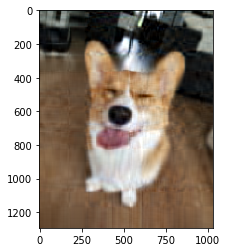

In [55]:
plt.imshow(temp)

Jak widzimy straciliśmy na jakości obrazka, lecz wciąż pozostaje on czytelny, a redukcja rozmiaru była znacząca.